<a href="https://colab.research.google.com/github/Kapongz/Bootstrap-test/blob/main/Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**hierarchical clustering**

> ເຊິ່ງເອີ້ນກັນວ່າ ການວິເຄາະກຸ່ມຕາມລຳດັບ, ແມ່ນລະບົບວິທີການທີ່ຈັດກຸ່ມວັດຖຸທີ່ຄ້າຍຄືກັນອອກເປັນກຸ່ມທີ່ເອີ້ນວ່າ clusters.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'



**1.   import pandas as pd**

> ນຳເອົາ Pandas ມາໃຊ້ແລ້ວຕັ້ງຊື່ໂຕປ່ຽນເປັນ pd ເພື່ອນຳເອົາໄປໃຊ້

> pandas ໃຊ້ໃນການຈັດການຂໍ້ມູນຂະໜາດນ້ອຍຈົນໄປຮອດຂໍ້ມູນຂະໜາດໃຫຍ່

**2.   import numpy as np**


> ນຳເອົາ numpy ມາໃຊ້ແລ້ວຕັ້ງຊື່ໂຕປ່ຽນເປັນ np ເພື່ອນຳເອົາໄປໃຊ້

> numpy ແມ່ນ Libary ທີ່ໃຊ້ໃນການຄຳນວນທາງຄະນິດສາດຂອງພາສາ Python ໂດຍ numpy ສາມາດຈັດການ ອາເຣ (array) ຫຼາຍມິຕິໄດ້

**3.   import matplotlib.pyplot as plt**

> ນຳເອົາ matplotlib.pyplot ມາໃຊ້ແລ້ວຕັ້ງຊື່ໂຕປ່ຽນເປັນ plt ເພື່ອນຳເອົາໄປໃຊ້

> matplotlib ແມ່ນ Module ພື້ນຖາມໃນການສ້າງກຣາຟ ໃນພາສາ python

**4.   import seaborn as sns**

> ນຳເອົາ seaborn ມາໃຊ້ແລ້ວຕັ້ງຊື່ໂຕປ່ຽນເປັນ sns ເພື່ອນຳເອົາໄປໃຊ້

> seaborn ເປັນ libary ຂອງ matplotlib ທີ່ໃຊ້ໄວ້ແຈກແຈງໃຫ້ເຮົາເຫັນພາບຂໍ້ມູນທີ່ເປັນແບບ ສຸ່ມ



**5.   %matplotlib inline**


> ແມ່ນ Magic command ທີ່ເຮັດໃຫ້ແຜນພາບທີ່ສ້າງໂດຍ matplotlib ສະແດງໃນເຊວ IPython 




**6.   %config InlineBackend.figure_format='retina'**

> ໃຊ້ %config InlineBackend. figure_format = 'retina' ຫຼັງຈາກ %matplotlib inline ເພື່ອສະແດງຮູບພາບທີ່ມີຄວາມລະອຽດສູງ

---

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')


pandas  version = 1.3.5
numpy   version = 1.21.6
seaborn version = 0.11.2




> **ສະແດງ version ຂອງ** ***pandas*** , ***numpy*** , ***seaborn***

---


In [3]:
pd.Timestamp.now()

Timestamp('2022-12-06 03:11:23.613138')



> **ສະແດງ ປີ-ເດືອນ-ວັນ ເວລາ  Timezone US/Pacific ສາມາດ custom ເປັນ Timezone ປະເທດເຮົາໄດ້ pd.Timestamp.now(tz='asia/vientiane')**


---



In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.csv')
df.sample(10)


,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
37,Mint Chocolate Chip,240,15.0,0.5,23,18,5.0
67,Wild ‘n Reckless,80,1.5,0.0,16,12,1.0
60,Strawberry Sorbet,70,0.0,0.0,17,13,0.1
69,World Class Chocolate,260,60.0,0.4,25,18,5.0
14,Chocolate Fudge,150,9.0,0.3,17,12,3.0
24,German Chocolate Cake,190,10.0,0.2,21,16,4.0
33,Mango Sorbet,70,0.0,0.0,16,12,0.0
54,Reese Peanut Butter Cup,180,11.0,0.3,17,14,4.0
12,Chocolate Chip,240,15.0,0.5,23,18,5.0
44,Perils of Praline,160,6.0,0.2,21,20,3.0




> **df ເປັນຕົວປ່ຽນສ້າງໄວ້ເກັບຄ່າຈາກການໃຊ້ pandas ຫຼື pd ອ່ານຟາຍນາມສະກຸນ csv ໃນຕົວຢ່າງຈະເປັນ Link ຂອງຟາຍ csv ມີຂໍ້ມູນຫຼາກຫຼາຍທີ່ເອົາໄວ້ໃນ repository github**

> **df.sample(10) ແມ່ນຈະເອົາຕົວປ່ຽນທີ່ເຮົາເກັບຄ່າໄວ້ແລ້ວເອົາຂໍ້ມູນມາສະແດງໂດຍໃຊ້ .sample(10) ຄືຈະ Random ຕົວຢ່າງມາ 10 ແຖວຈາກຂໍ້ມູນທີ່ມີທັງໝົດໃນຟາຍນັ້ນ**


---







In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB




> **df.info(): .info() ຈະເປັນ function ເພື່ອສະແດງຂໍ້ມູນລາຍລະອຽດທັງໝົດໃນ DataFrame ແບບຫຍໍ້**


---




#**Scikit-learn: Hierarchical** **Clustering**


> Scikit-learn ແມ່ນ machine learning library ໃນພາສາການຂຽນໂປຣແກຣມ Python





In [6]:
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch # draw dendrogram




> from sklearn import preprocessing ເປັນການ import preprocessing ມາຈາກ sklearn ເຊິ່ງ preprocessing ແມ່ນເຕັກນິກທີ່ຖືກນໍາໃຊ້ເພື່ອປ່ຽນຂໍ້ມູນດິບເຂົ້າໄປໃນຊຸດຂໍ້ມູນທີ່ສະອາດ.

> from sklearn.cluster import AgglomerativeClustering ເປັນການ import AgglomerativeClustering ມາຈາກ sklearn.cluster ເຊິ່ງ AgglomerativeClustering ແມ່ນເປັນປະເພດຂອງ Hierarchical Clustering ມັນເປັນການຈັດກຸ່ມການຮ່ວມກຸ່ມ. ປະສົມຄູ່ຂອງກຸ່ມຂໍ້ມູນຕົວຢ່າງແບບວົນຊໍ້າ ໃຊ້ໄລຍະເຊື່ອມໂຍງ

> import scipy.cluster.hierarchy ເປັນການ import scipy.cluster.hierarchy ເຂົ້າມາໃຊ້ ແລ້ວແທນດ້ວຍໂຕປ່ຽນ sch ເຊິ່ງ scipy.cluster.hierarchy ແມ່ນ functions ຕັດການແບ່ງກຸ່ມຕາມລຳດັບເປັນກຸ່ມ [flat clusterings](https://nlp.stanford.edu/IR-book/html/htmledition/flat-clustering-1.html#:~:text=Flat%20clustering%20creates%20a%20flat,problem%20of%20labeling%20clusters%20automatically.) ຫຼື ຄົ້ນຫາຮາກຂອງ forest ທີ່ເກີດຈາກການຕັດໂດຍການໃຊ້ລະຫັດ flat cluster ids ຂອງການສັງເກດແຕ່ລະຄັ້ງ

> dendrogram ແມ່ນແຜນວາດຕົ້ນໄມ້ທີ່ມັກໃຊ້ເພື່ອວາດພາບຜົນຂອງການຈັດກຸ່ມຕາມລຳດັບ.









In [7]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']


> cols ແມ່ນໂຕປ່ຽນ ທີ່ເກັບຊື່ Column ຂອງ dataFrame ເປັນຮູບແບບ array

In [8]:
## Yeo-Johnson transformation (preferable)
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) # support only positive value
mat = pt.fit_transform(df[cols])
mat[:5].round(4)


array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])



> pt ແມ່ນໂຕປ່ຽນໄວ້ເກັບຄ່າທີ່ໄດ້ຈາກການ preprocessing.PowerTransformer ແລະ PowerTransformer ແມ່ນເປັນຕະກູນຂອງການແປງແບບ parametric ແບບ monotonic ທີ່ຖືກນໍາໃຊ້ເພື່ອເຮັດໃຫ້ຂໍ້ມູນຄ້າຍຄື Gaussian ຫຼາຍ

> method='yeo-johnson' ເປັນວິທີແປງຟາຍ yeo-johnson ແມ່ນເຮັດວຽກກັບຄ່າທາງບວກແລະລົບ

> standardize=True ຕັ້ງເປັນ True ເພື່ອນຳໃຊ້ຄ່າສູນ,

> mat ແມ່ນຕົວປ່ຽນທີ່ໄດ້ຈາກການເອົາ pt ໄປ fit_transform(df[cols]) 

> fit(data) ຖືກນໍາໃຊ້ເພື່ອຄິດໄລ່ຄ່າສະເລ່ຍ ແລະ std dev ສໍາລັບຄຸນສົມບັດທີ່ໃຫ້ມາເພື່ອນໍາໃຊ້ຕື່ມອີກສໍາລັບການປັບຂະຫນາດ.

> transform(data) ຖືກນໍາໃຊ້ເພື່ອປັບຂະຫນາດໂດຍໃຊ້ຄ່າສະເລ່ຍ ແລະ std dev ຄິດໄລ່ໂດຍໃຊ້ວິທີການ .fit()

> fit_transform() ແມ່ນລວມ fit ແລະ transform .

> df[cols] ແມ່ນ Dataframe ພ້ອມຂໍ້ມູນພາຍໃນ Column

> mat[:5] ແບ່ງສ່ວນຂໍ້ມູນໃນ array ເປັນ  5 

> .round(4) ຟັງຊັນສົ່ງຄືນຕົວເລກຈຸດທີ່ເປັນຕົວເລກແບບເສດ ແລະ ຕົວເລກທົດສະນິຍົມ


In [23]:
X=pd.DataFrame(mat, columns=cols)
X.head()


,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181




> X ເປັນໂຕປ່ຽນທີ່ເອົາໄວ້ເກັບຂໍ້ມູນຈາກການເອົາ pd.DataFrame(mat, columns=cols)

> DataFrame ແມ່ນໂຄງສ້າງຂໍ້ມູນແບບ 2 ມິຕິທີ່ມີຖັນຂອງປະເພດຕ່າງໆ. 
ex: padas.DataFrame(data,column=['column-name'])

> X.head() ເປັນການເອົາຂໍ້ມູນ 5 ແຖວທຳອີດມາສະແດງ







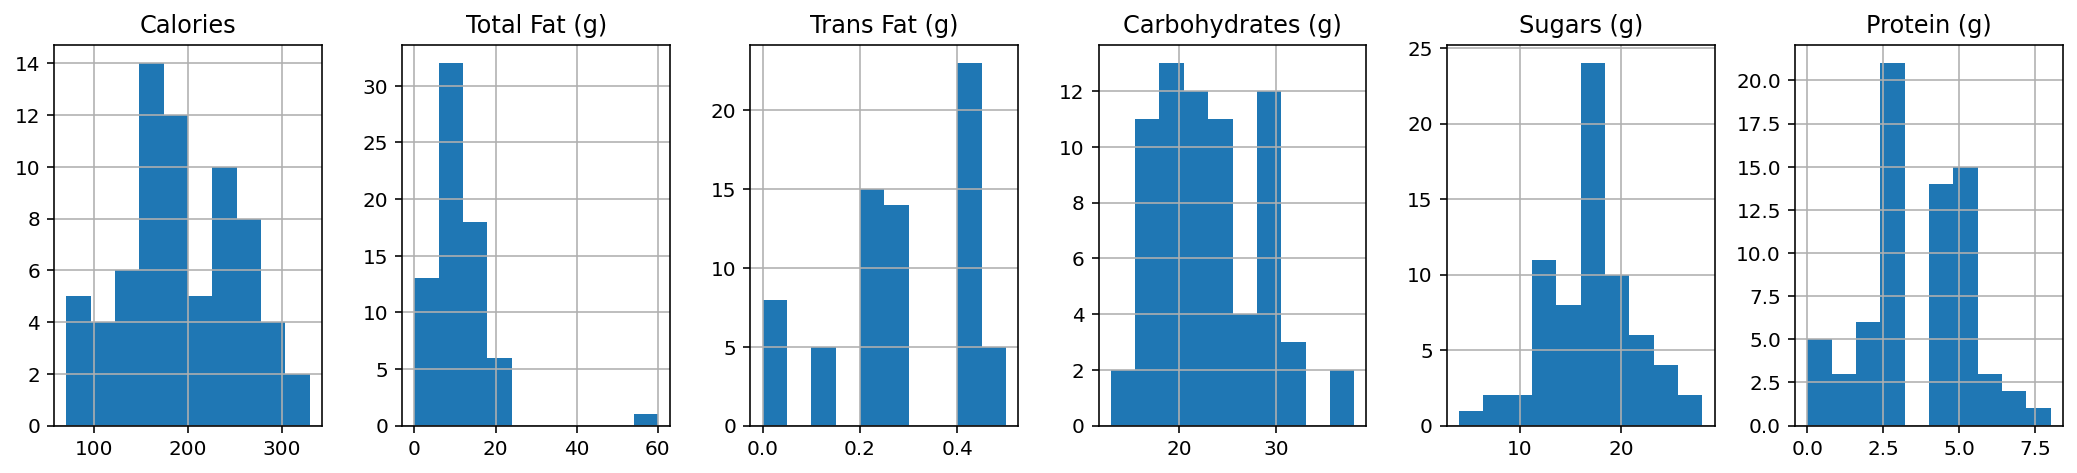

In [21]:
df[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));



> ການເອົາ Dataframe ມາສະແດງເປັນ graph

> ຟັງຊັນ hist() ໃນໂມດູນ pyplot ຂອງ library matplotlib ແມ່ນໃຊ້ເພື່ອວາງ [histogram](https://www.w3schools.com/python/matplotlib_histograms.asp#:~:text=Histogram,observations%20within%20each%20given%20interval.) ພາຍໃນກໍຈະມີການກຳນົດ layout ແລະ ຂະໜາດຂອງ garph

> Layout() ແມ່ນ Container ທີ່ໃຊ້ໃນການຈັດວາງ widget ໃນລັກສະນະສະເພາະ

> len() ແມ່ນຫນຶ່ງໃນ functions ຂອງ Python ມັນສົ່ງຄືນຄ່າຄວາມຍາວຂອງວັດຖຸ

> figsize() ແມ່ນຂະຫນາດຂອງຮູບພາບທີ່ສົ່ງອອກ


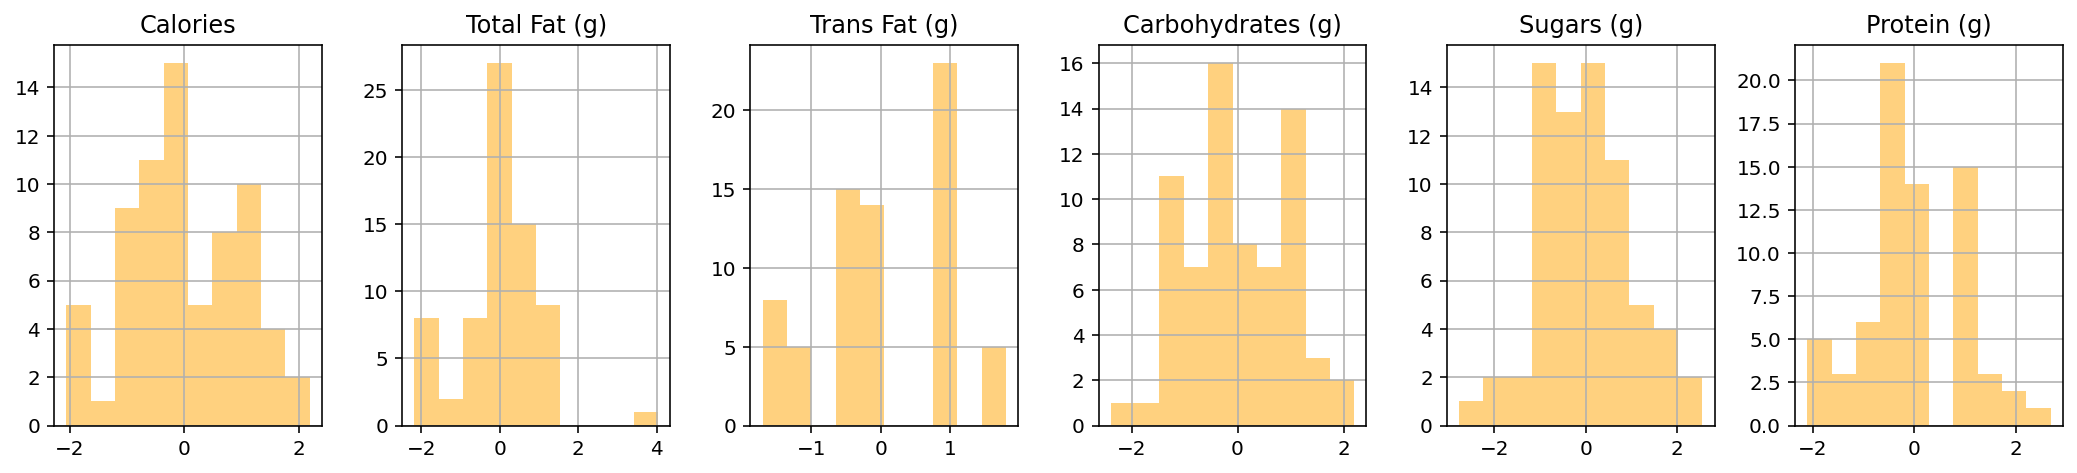

In [24]:
X[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange', alpha=.5);



> X ເປັນ Dataframe ທີ່ໄດ້ຈາກການ fit_tranform



In [ ]:
fig, ax=plt.subplots(figsize=(20, 7))
dg=sch.dendrogram(sch.linkage(X, method='ward'), ax=ax, labels=df['Flavour'].values)
# dg=sch.dendrogram(sch.linkage(df[cols], method='ward'), ax=ax)


In [ ]:
# doc: https://seaborn.pydata.org/generated/seaborn.clustermap.html
sns.clustermap(X, col_cluster=False, cmap="Blues")


In [ ]:
hc=AgglomerativeClustering(n_clusters=2, linkage='ward')
hc


In [ ]:
hc.fit(X)

In [ ]:
df['cluster']=hc.labels_
df.head()


In [ ]:
df.sample(10)

In [ ]:
df.groupby('cluster').agg(['count', 'mean', 'median']).T

In [ ]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df, ax=ax[i])


In [ ]:
dx=X
dx['cluster']=hc.labels_


In [ ]:
df.groupby('cluster').head(3).sort_values('cluster')

#**Scikit-learn: KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2)
model


In [ ]:
# X=df[cols]

In [ ]:
model.fit(X)

In [ ]:
model.labels_

In [ ]:
df['cluster_kmeans']=model.labels_

In [ ]:
df.head()